<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

# Introduction


**Kelompok 02 - Final Project 2 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. Taufik Aji Putra<br>
PYTN-KS05-003

2. M. Ihwanul Iqbal<br>
PYTN-KS05-004

## Project Overview
Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset dapat ditemukan melalui link <a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"><b> klik disini</b></a>.  Dataset ini memiliki 23 atribut yang berisi informasi mengenai record data hujan harian selama 10 tahun di Australia. Obejktif yang ingin dicapai dari penelitian ini adalah untuk memprediksi cuaca apakah hari selanjutnya hujan atau tidak dengan mengimplementasikan analisa prediction menggunakan algoritma Logistic Regression dan Support Vector Machine (SVM). Sebelum melakukan modeling perlu dilakukan processing data agar model prediksi yang dihasilkan memiliki tingkat akurasi yang optimal.
#### Final Project 2 ini dibuat guna mengevaluasi konsep Classification sebagai berikut:
* Mampu memahami konsep Classification dengan Logistic Regression dan SVM
* Mampu mempersiapkan data untuk digunakan dalam model  Logistic Regression dan SVM
* Mampu mengimplementasikan  Logistic Regression dan SVM untuk membuat prediksi

#### Attribute Information:
- Date - tanggal hari itu
- Location - lokasi, nama kota di Australia
- MinTemp - temperatur terendah hari itu dalam celcius
- MaxTemp - temperatur tertinggi hari itu dalam celcius
- Rainfall - jumlah curah hujan hari itu dalam mm
- Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am - arah angin jam 9 pagi
- WindDir3pm - arah angin jam 3 sore
- WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am - humiditas jam 9 pagi dalam persen
- Humidity3pm - humiditas jam 3 sore dalam persen
- Pressure9am - tekanan udara jam 9 pagi dalam hpa
- Pressure3pm - tekanan udara jam 3 sore dalam hpa
- Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit 1⁄8, menghitung berapa unit 1⁄8 dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm - persentase langit yang tertutup awan jam 3 sore
- Temp9am - temperatur jam 9 pagi dalam celcius
- Temp3pm - temperatur jam 3 sore dalam celcius
- RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
- RainTomorrow - variable yang mau di prediksi

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

#Load Dataset

**Mengimport dataset yang akan digunakan**

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'taufikajip'
os.environ['KAGGLE_KEY'] = '7f1ea81999ae0bff7b14bd8c95f733e3'

In [3]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

weather-dataset-rattle-package.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Ekstrak File berbentuk ZIP
from zipfile import ZipFile

file_name = "/content/weather-dataset-rattle-package.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


**Melihat dataset yang sudah diimport**

In [5]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Exploratory Data Analysis

## RainTomorrow

**Persebaran data target "RainTomorrow"**

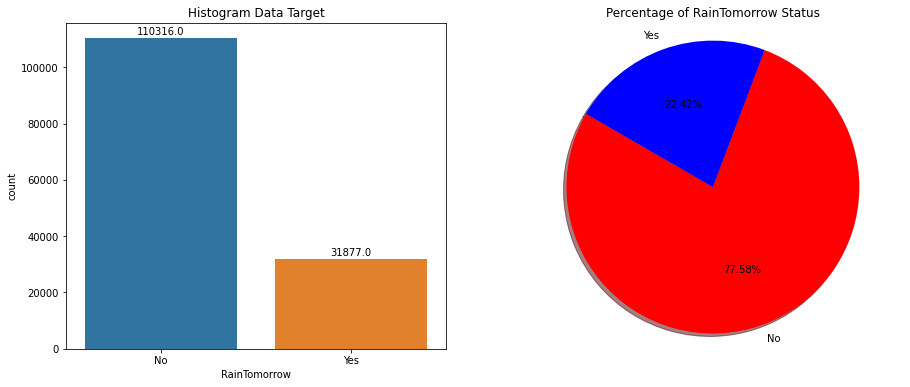

In [8]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Histogram Data Target")
ax = sns.countplot(x='RainTomorrow', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.subplot(122)
plt.title("Percentage of RainTomorrow Status")
rainTomorrow_values_count = df['RainTomorrow'].value_counts()
rainTomorrow_size = rainTomorrow_values_count.values.tolist()
rainTomorrow_labels = 'No', 'Yes'
colors=['red', 'blue']
pcs, texts, autotexts = plt.pie(rainTomorrow_size, labels=rainTomorrow_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show()

Dapat dilihat bahwa data target mengalami imbalanced, sehingga akan dilakukan pengatasan imbalanced pada section preprocessing.

**Kota dengan Intensitas Hujan Harian Paling Banyak**

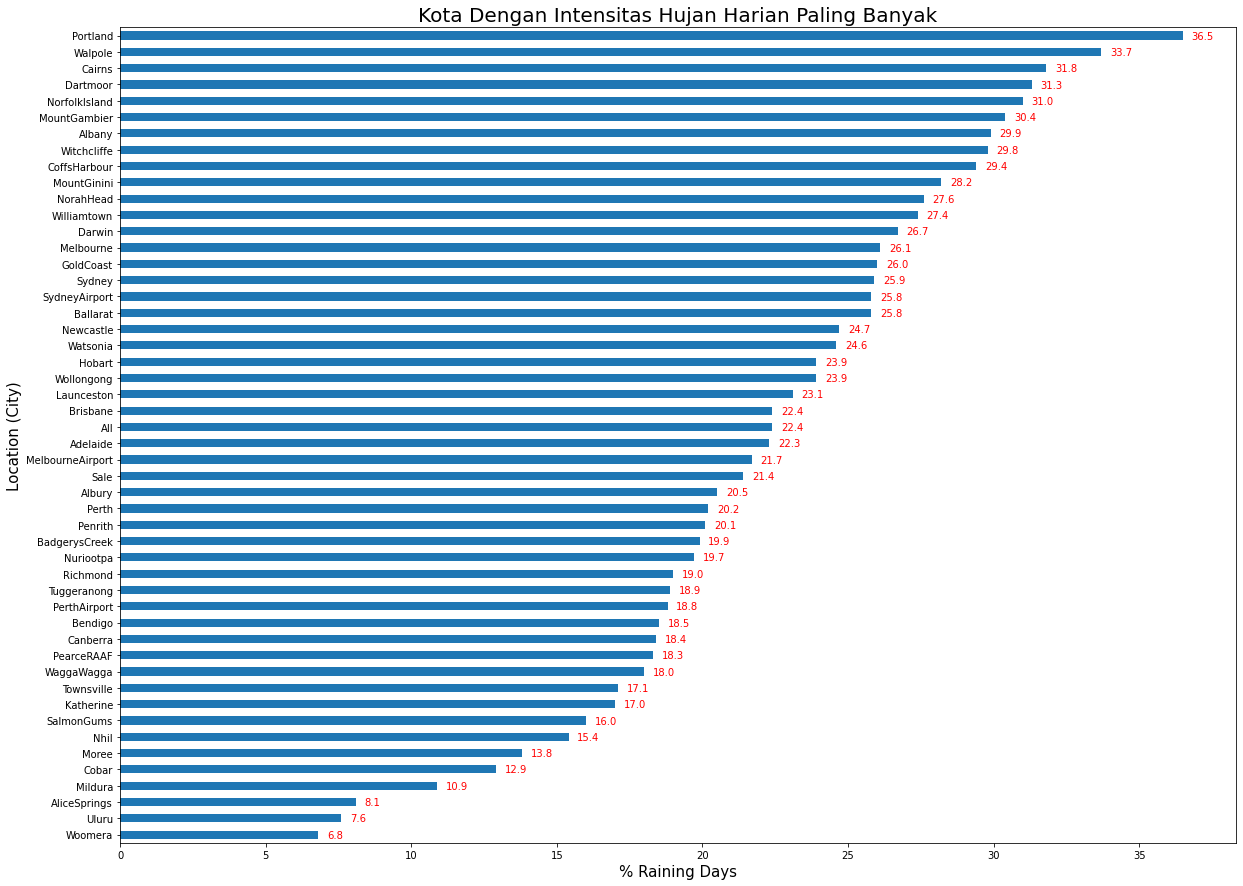

In [9]:
loc_rain = pd.crosstab(index=df['Location'], columns=df['RainTomorrow'], values=df['RainTomorrow'],
                           aggfunc='count', margins=True)
loc_rain['% Yes'] = (loc_rain['Yes']/loc_rain['All']).round(3)*100
fig, ax = plt.subplots(figsize=(20,15))
loc_rain['% Yes'].sort_values().plot(kind='barh')
ax.set_xlabel("% Raining Days", fontsize=15)
ax.set_ylabel("Location (City)", fontsize=15)
ax.set_title("Kota Dengan Intensitas Hujan Harian Paling Banyak", fontsize=20)
y = loc_rain['% Yes'].sort_values().values
for k,v in enumerate(y):
    ax.text(v+0.3 , k-0.2 , round(float(v),1), color='red')

Dapat disimpulkan bahwa kota dengan intensitas hujan harian terbanyak adalah **Portland**, sedangkan yang terkecil adalah **Woomera**

**Intensitas Hujan berdasarkan bulan**

Text(0.5, 1.0, 'Intensitas Hujan Berdasarkan Bulan')

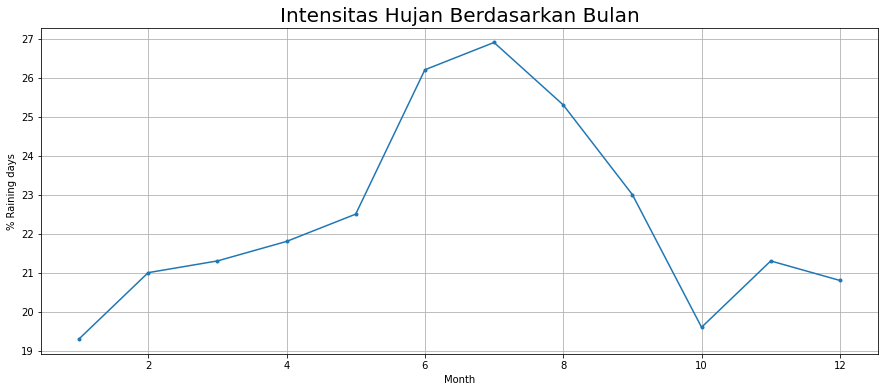

In [10]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
rain_by_month = pd.crosstab(index=df['Month'], columns=df['RainTomorrow'],margins=True)
rain_by_month['% Yes'] = (rain_by_month['Yes']/rain_by_month['All']).round(3)*100
rain_by_month.iloc[:-1,-1].plot(style=".-")
plt.xlabel("Month")
plt.ylabel("% Raining days")
plt.grid()
plt.title("Intensitas Hujan Berdasarkan Bulan", fontsize=20)

Dapat dilihat dari grafik bahwa intensitas hujan pada bulan Januari-Juli mengalami kenaikan cukup signifikan, sedangkan untuk bulan Juli-Oktober mengalami penurunan yang signifikan. Dilanjutkan mengalami kenaikan sedikit pada 2 bulan terakhir yakni November-Desember

# Data Cleaning

Sebelum melakukan data cleaning, akan dilakukan terlebih dahulu drop fitur:

* **date**, karena pada dataset sudah memiliki fitur 'Month' untuk mewakili
* **location**, karena tujuan dari pemodelan ini adalah untuk memprediksi cuaca hujan secara global, namun memang dengan menggunakan dataset daerah Australia sebagai data.

In [11]:
df.drop(columns=['Date','Location'], axis=1, inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


## Handling Missing Value

In [12]:
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64

Terdapat banyak missing value pada dataset ini khususnya pada atribut target yaitu RainTomorrow, missing value pada kolom tersebut bisa langsung di drop karena jika tidak dihapus atau diisi dengan metode seperti mean/median akan menimbulkan bias pada hasil prediksi nanti. Untuk fitur yang lain akan dilakukan pengisian missing value sesuai dengan tipe datanya (Numerik/Kategorik)

In [13]:
# Penghapusan Missing Value untuk data Target "RainTomorrow"
df.dropna(subset=['RainTomorrow'], inplace=True)

**Melihat kembali Missing Value dalam bentuk persen dan dataframe**

In [14]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/142193)*100
missing_values

,Column,%
Sunshine,67816,47.692924
Evaporation,60843,42.789026
Cloud3pm,57094,40.152469
Cloud9am,53657,37.735332
Pressure9am,14014,9.855619
Pressure3pm,13981,9.832411
WindDir9am,10013,7.041838
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir3pm,3778,2.656952


**Handling Missing Value (Numerik)**

In [15]:
# Mendefinisikan fitur yang bertipe Numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Numerical Columns : {num_cols}")

# Melakukan handling missing value untuk tipe data numerik dengan mengisikan nilai mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

Numerical Columns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month']


**Handling Missing Value (Kategorik)**

In [16]:
# Mendefinisikan fitur yang bertipe Kategorik
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(f"Categorical Column : {categorical_cols}")

# Melakukan handling missing value untuk tipe data kategorik dengan mengisikan nilai modus
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Categorical Column : ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


**Mengecek kembali Missing Value**

In [17]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/142193)*100
missing_values

,Column,%
MinTemp,0,0.0
MaxTemp,0,0.0
RainTomorrow,0,0.0
RainToday,0,0.0
Temp3pm,0,0.0
Temp9am,0,0.0
Cloud3pm,0,0.0
Cloud9am,0,0.0
Pressure3pm,0,0.0
Pressure9am,0,0.0


##Handling Outliers

In [18]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,6.402544
std,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,3.426506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,3.000000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,6.000000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,12.000000


Dapat dilihat bahwa terdapat outlier yang cukup besar pada beberapa fitur seperti pada fitur Rainfall,evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm

**Mengecek Outlier Secara Visual (Boxplot)**

Akan dilakukan checking outliers untuk melihat outlier lebih lanjut pada setiap fitur (numerik) yang ada.

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month']


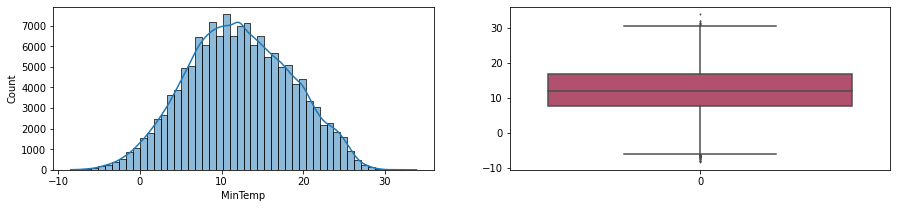

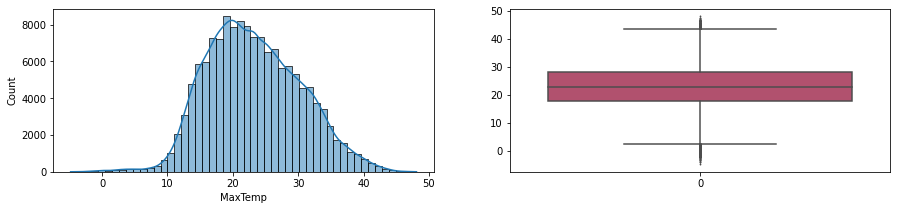

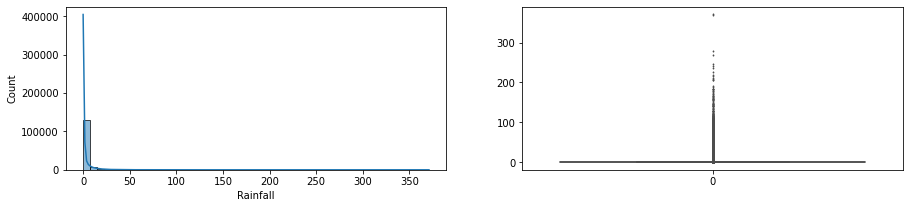

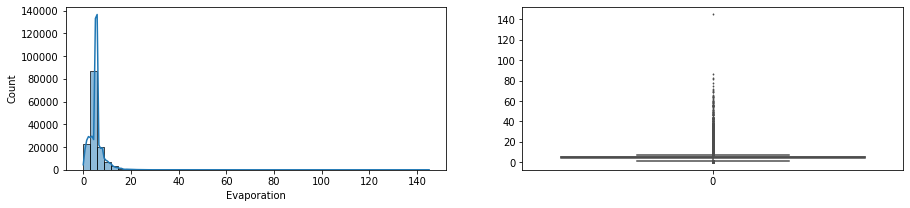

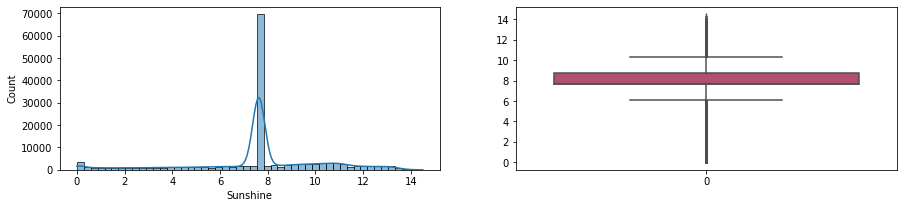

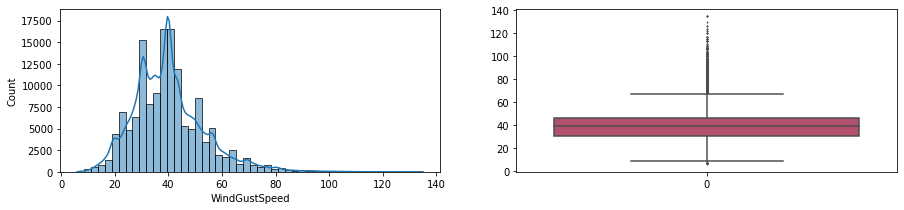

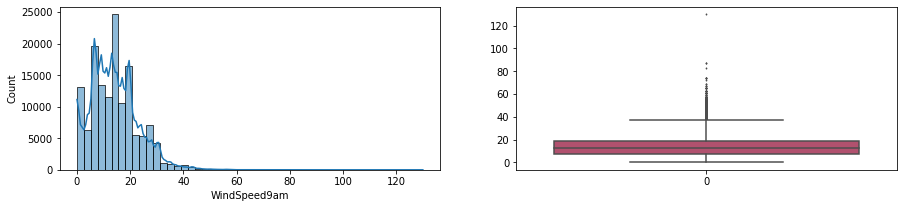

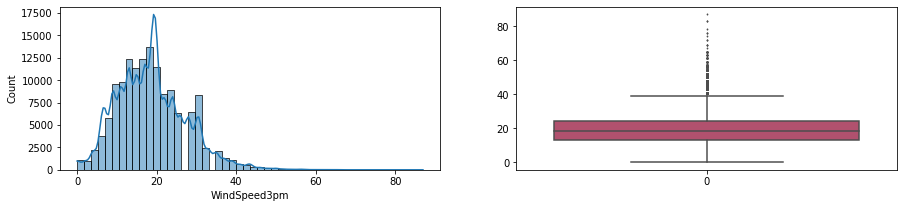

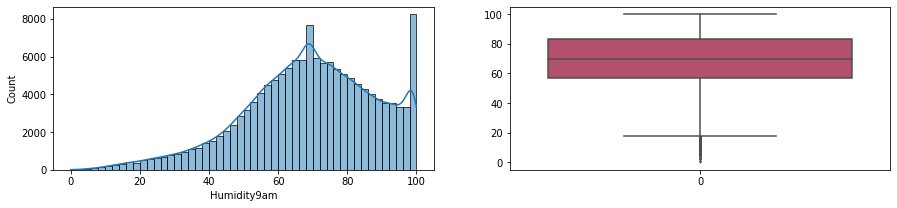

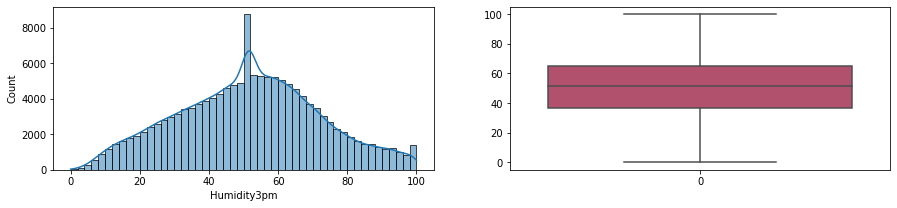

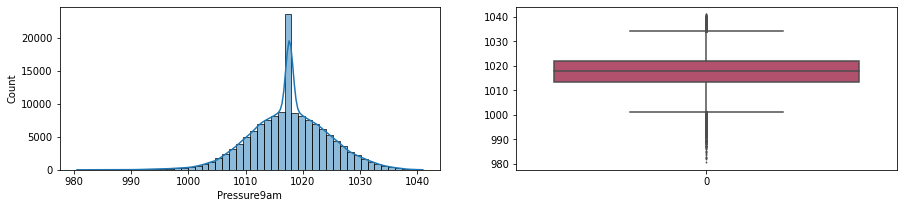

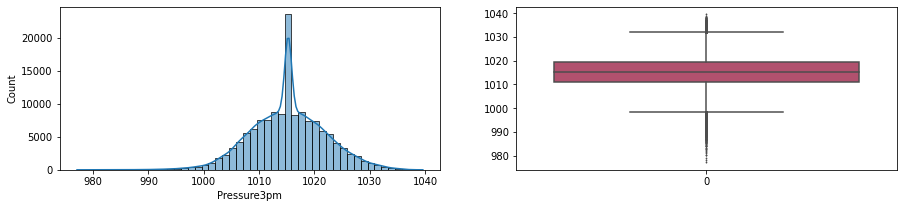

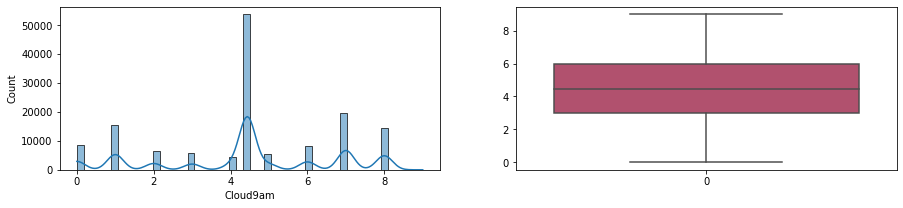

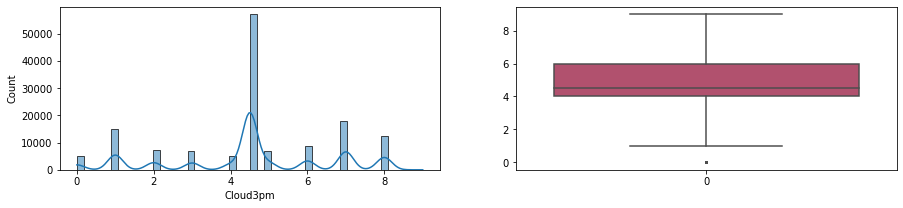

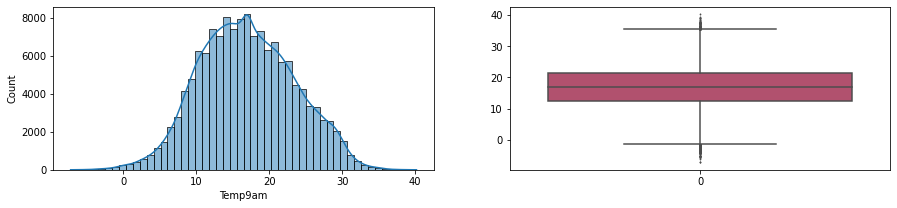

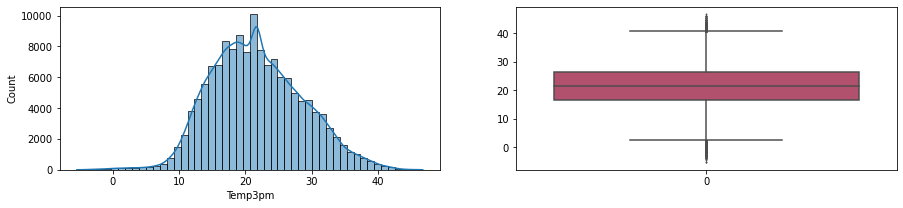

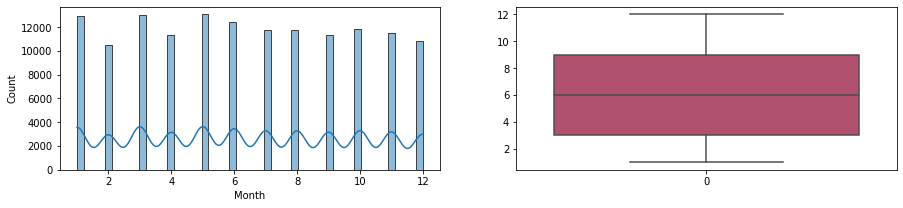

In [19]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)
for i in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    sns.histplot(df[i],bins=50,kde=True, ax=ax[0])
    sns.boxplot(data=df[i], ax=ax[1],palette='flare', fliersize=1)

Dapat dilihat bahwa secara keseluruhan, setiap fitur memiliki outlier, namun pada fitur "Rainfall" terlihat memiliki distorsi data yang sangat besar, sehingga akan dilakukan drop fitur tersebut.

In [20]:
df.drop("Rainfall", axis=1, inplace=True)
df.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,13.4,22.9,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,12
1,7.4,25.1,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,12
2,12.9,25.7,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,12
3,9.2,28.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,12
4,17.5,32.3,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,12


**Melakukan filtering untuk remove outlier**

In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur MinTemp : <-6.2 atau >30.6
Rentang nilai outlier pada fitur MaxTemp : <2.45 atau >43.65
Rentang nilai outlier pada fitur Evaporation : <1.8 atau >7.67
Rentang nilai outlier pada fitur Sunshine : <6.01 atau >10.31
Rentang nilai outlier pada fitur WindGustSpeed : <8.5 atau >68.5
Rentang nilai outlier pada fitur WindSpeed9am : <-11.0 atau >37.0
Rentang nilai outlier pada fitur WindSpeed3pm : <-3.5 atau >40.5
Rentang nilai outlier pada fitur Humidity9am : <18.0 atau >122.0
Rentang nilai outlier pada fitur Humidity3pm : <-5.0 atau >107.0
Rentang nilai outlier pada fitur Pressure9am : <1001.05 atau >1034.25
Rentang nilai outlier pada fitur Pressure3pm : <998.4 atau >1032.0
Rentang nilai outlier pada fitur Cloud9am : <-1.5 atau >10.5
Rentang nilai outlier pada fitur Cloud3pm : <1.0 atau >9.0
Rentang nilai outlier pada fitur Temp9am : <-1.5 atau >35.3
Rentang nilai outlier pada fitur Temp3pm : <2.3 atau >40.7
Rentang nilai outlier pada fitur Month : <-6.0 atau 

**Melihat kembali Boxplot**

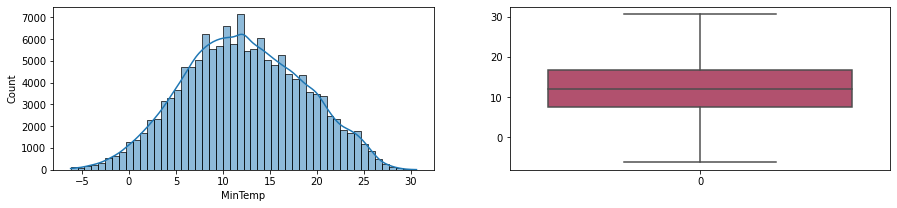

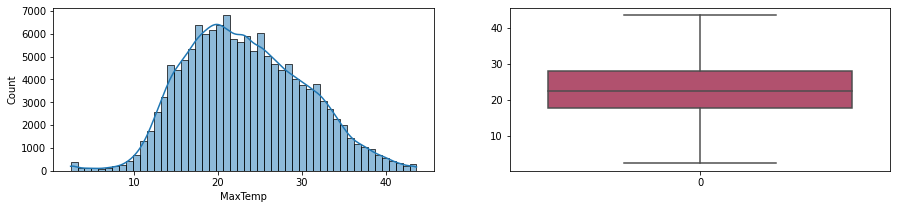

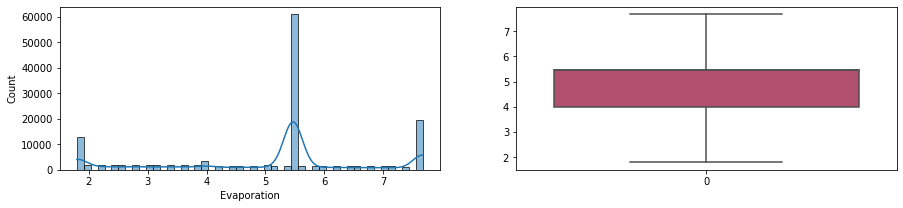

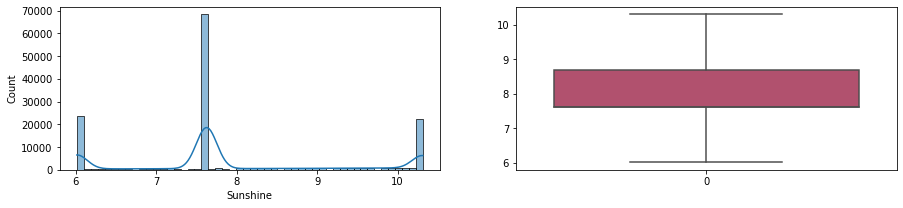

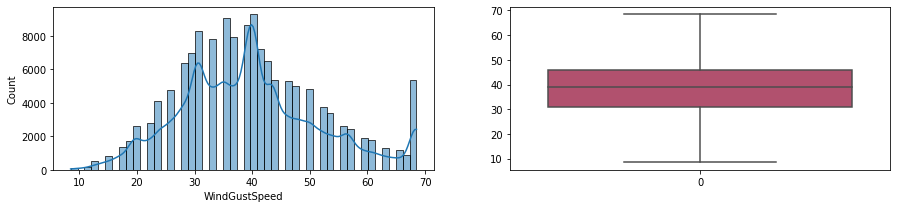

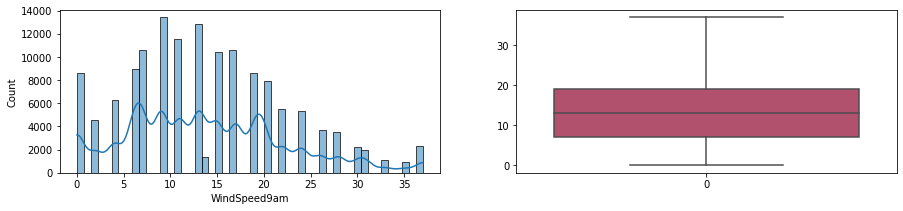

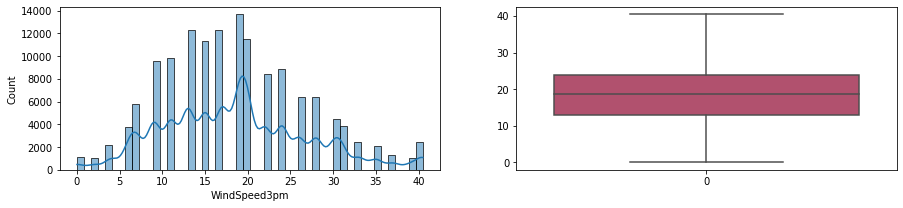

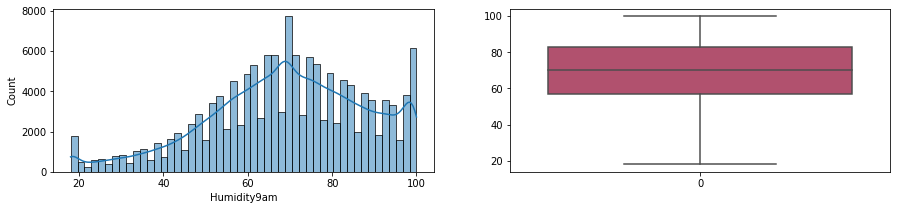

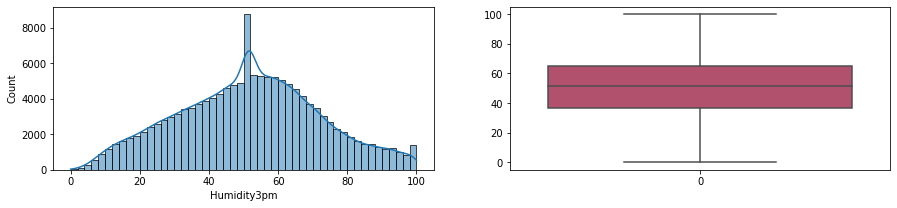

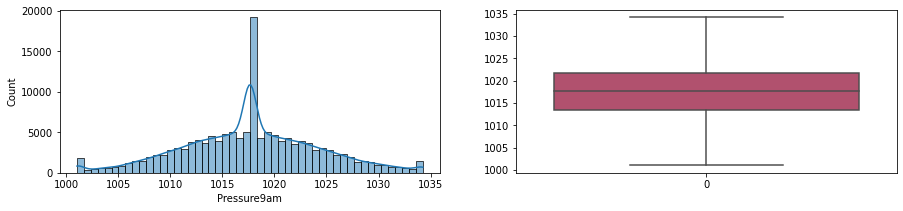

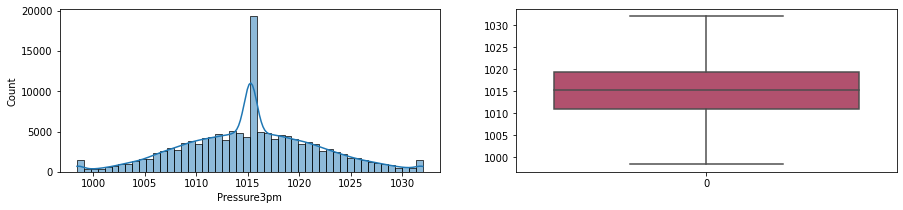

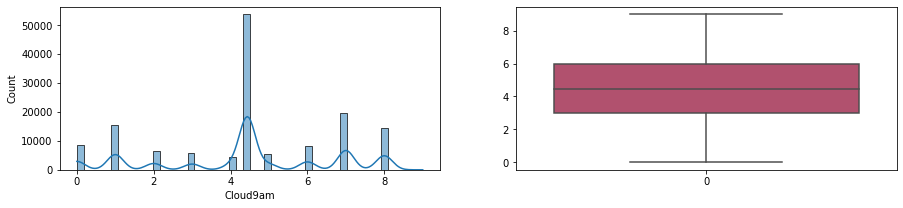

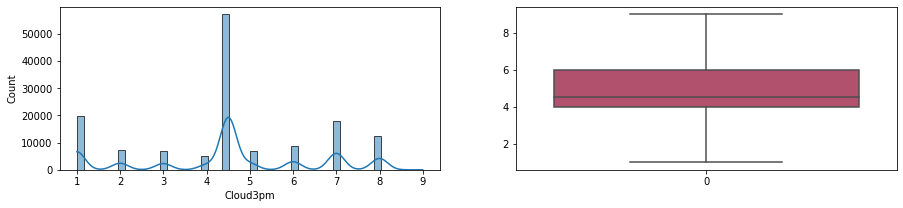

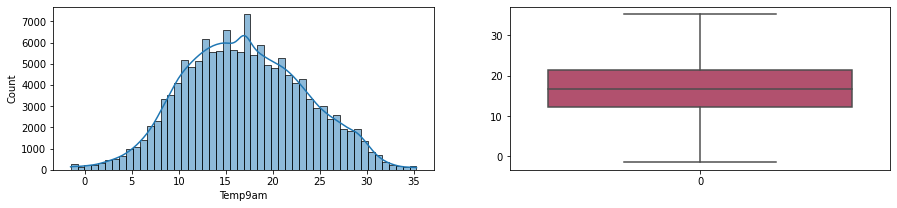

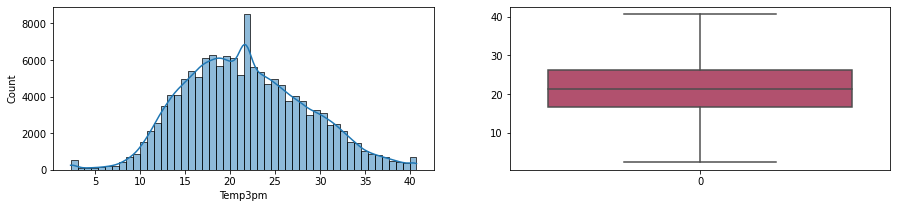

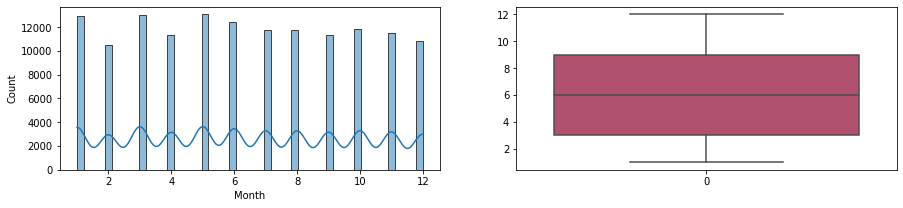

In [22]:
for i in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    sns.histplot(df[i],bins=50,kde=True, ax=ax[0])
    sns.boxplot(data=df[i], ax=ax[1],palette='flare', fliersize=1)

# Data Preprocessing

## Binary Encode & One Hot Encoding

In [23]:
# Binary Encode untuk fitur RainToday dan RainTomorrow
df['RainToday'] = df['RainToday'].replace({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,'No':0})

In [24]:
# Mendefinisikan kolom kategorikal
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['WindGustDir', 'WindDir9am', 'WindDir3pm']


In [25]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)

In [26]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir9am_nan', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindD

In [27]:
df

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,1024.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145455,2.8,23.4,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,3.6,25.3,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,5.4,26.9,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Mengecek kembali Missing Values**

In [28]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/145459)*100
missing_values

,Column,%
MinTemp,3266,2.245306
WindGustDir_SE,3266,2.245306
WindGustDir_ESE,3266,2.245306
WindGustDir_NE,3266,2.245306
WindGustDir_NNE,3266,2.245306
...,...,...
WindDir3pm_N,0,0.000000
WindDir3pm_ESE,0,0.000000
WindDir3pm_ENE,0,0.000000
WindDir3pm_E,0,0.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145459 entries, 0 to 145458
Data columns (total 68 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Evaporation      142193 non-null  float64
 3   Sunshine         142193 non-null  float64
 4   WindGustSpeed    142193 non-null  float64
 5   WindSpeed9am     142193 non-null  float64
 6   WindSpeed3pm     142193 non-null  float64
 7   Humidity9am      142193 non-null  float64
 8   Humidity3pm      142193 non-null  float64
 9   Pressure9am      142193 non-null  float64
 10  Pressure3pm      142193 non-null  float64
 11  Cloud9am         142193 non-null  float64
 12  Cloud3pm         142193 non-null  float64
 13  Temp9am          142193 non-null  float64
 14  Temp3pm          142193 non-null  float64
 15  RainToday        142193 non-null  float64
 16  RainTomorrow     142193 non-null  floa

**Melakukan Handling Missing Values**

In [30]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Numerical Columns : {num_cols}")
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

Numerical Columns : ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S

In [31]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/145459)*100
missing_values

,Column,%
MinTemp,0,0.0
WindDir9am_SE,0,0.0
WindDir9am_WSW,0,0.0
WindDir9am_WNW,0,0.0
WindDir9am_W,0,0.0
...,...,...
WindGustDir_SSE,0,0.0
WindGustDir_SSW,0,0.0
WindGustDir_SW,0,0.0
WindGustDir_W,0,0.0


## Correlation Check

**Mengecek korelasi pada fitur yang tidak dilakukan One Hot Encoding**

In [32]:
cols = ['RainTomorrow','MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
        'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
        'RainToday', 'Month']
df_new = df[cols]
df_new.head()

,RainTomorrow,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,0.0,13.4,22.9,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,12.0
1,0.0,7.4,25.1,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,12.0
2,0.0,12.9,25.7,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,12.0
3,0.0,9.2,28.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,12.0
4,0.0,17.5,32.3,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,12.0


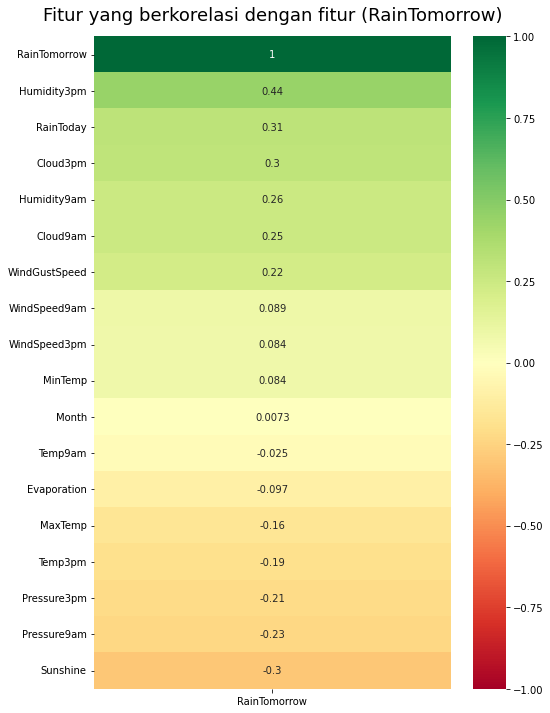

In [33]:
plt.figure(figsize=(8, 12))
heatmap =sns.heatmap(df_new.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Fitur yang berkorelasi dengan fitur (RainTomorrow)', fontdict={'fontsize':18}, pad=16);

Fitur 'MinTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Month' memiliki korelasi yang cukup rendah terhadap Rain Tomorrow. Sehingga fitur-fitur tersebut akan dilakukan drop.

In [34]:
df.drop(columns=['MinTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Month'], axis=1, inplace=True)
df.head()

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25.1,7.624853,44.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,24.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.7,7.624853,46.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,23.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28.0,7.624853,24.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.3,7.624853,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.columns

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
     

### WinGustDir - RainTomorrow

In [36]:
cols = ['RainTomorrow', 'WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE','WindGustDir_SSE',
        'WindGustDir_SSW','WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']
df_new = df[cols]
df_new.head()

,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


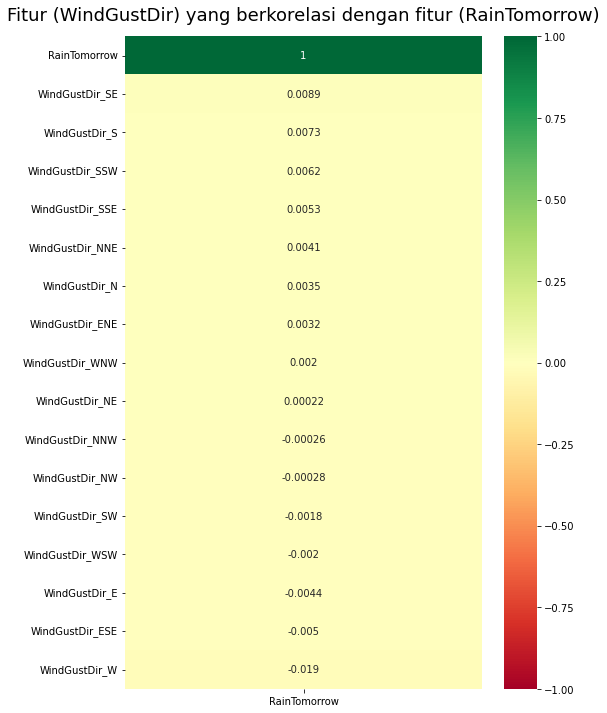

In [37]:
plt.figure(figsize=(8, 12))
heatmap =sns.heatmap(df_new.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Fitur (WindGustDir) yang berkorelasi dengan fitur (RainTomorrow)', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa setiap fitur memiliki korelasi yang kecil, sehingga akan dilakukan drop fitur WindGustDir.

In [38]:
drop_cols = ['WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE','WindGustDir_SSE',
        'WindGustDir_SSW','WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25.1,7.624853,44.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,24.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.7,7.624853,46.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,23.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28.0,7.624853,24.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.3,7.624853,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.columns

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan'],
      dtype='object')

### WindDir9am - RainTomorrow

In [40]:
cols = ['RainTomorrow', 'WindDir9am_E','WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
       'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
        'WindDir9am_SSW', 'WindDir9am_SW','WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan']
df_new = df[cols]
df_new.head()

,RainTomorrow,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


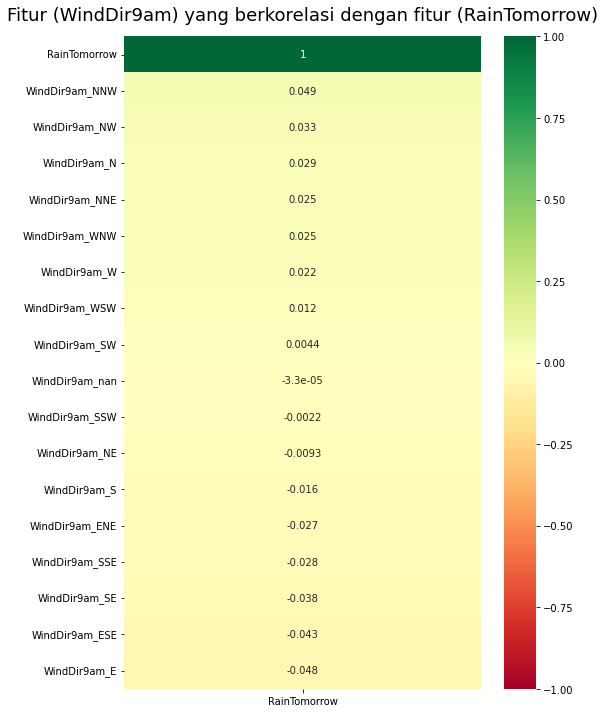

In [41]:
plt.figure(figsize=(8, 12))
heatmap =sns.heatmap(df_new.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Fitur (WindDir9am) yang berkorelasi dengan fitur (RainTomorrow)', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa setiap fitur memiliki korelasi yang kecil, sehingga akan dilakukan drop fitur-fitur WindDir9am.

In [42]:
drop_cols = ['WindDir9am_E','WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE','WindDir9am_NNE',
             'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE','WindDir9am_SSW',
             'WindDir9am_SW','WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25.1,7.624853,44.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,24.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.7,7.624853,46.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,23.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28.0,7.624853,24.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.3,7.624853,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.columns

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan'],
      dtype='object')

### WindDir3pm - RainTomorrow

In [44]:
cols = ['RainTomorrow','WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'WindDir3pm_nan']
df_new = df[cols]
df_new.head()

,RainTomorrow,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


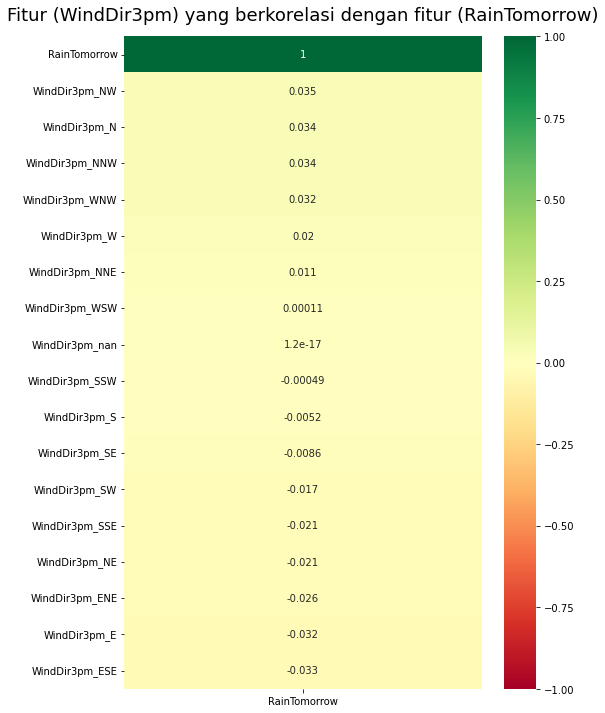

In [45]:
plt.figure(figsize=(8, 12))
heatmap =sns.heatmap(df_new.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Fitur (WindDir3pm) yang berkorelasi dengan fitur (RainTomorrow)', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa setiap fitur memiliki korelasi yang kecil, sehingga akan dilakukan drop fitur WindDir3pm.

In [46]:
drop_cols = ['WindDir3pm_E','WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N','WindDir3pm_NE','WindDir3pm_NNE','WindDir3pm_NNW',
             'WindDir3pm_NW','WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW','WindDir3pm_SW',
             'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW','WindDir3pm_nan']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,0.0,0.0
1,25.1,7.624853,44.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,24.3,0.0,0.0
2,25.7,7.624853,46.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,23.2,0.0,0.0
3,28.0,7.624853,24.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,26.5,0.0,0.0
4,32.3,7.624853,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,0.0,0.0


In [47]:
df.columns

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

## Skewness Check

In [48]:
from scipy.stats import skew

cols = ['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm']

for col in cols:
    print(col)
    print(skew(df[col]))

MaxTemp
0.24197993408583413
Sunshine
0.4863606879360188
WindGustSpeed
0.44869064943408815
Humidity9am
-0.4392860750301736
Humidity3pm
0.03536096185152833
Pressure9am
0.0077924269423353554
Pressure3pm
0.030475783059580975
Cloud9am
-0.28747776850395046
Cloud3pm
-0.17350040101639566
Temp3pm
0.25961592990415105


MaxTemp
0.24197993408583413


<Figure size 1080x432 with 0 Axes>

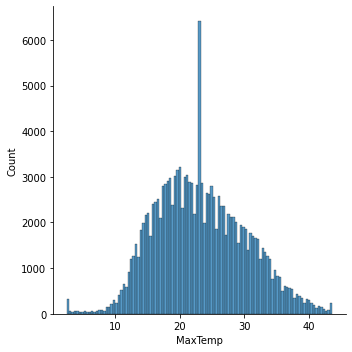

Sunshine
0.4863606879360188


<Figure size 1080x432 with 0 Axes>

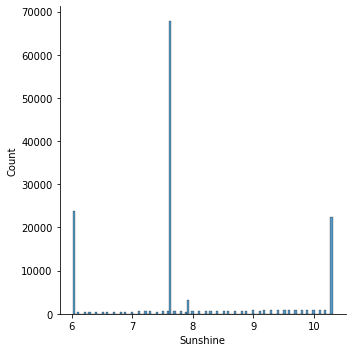

WindGustSpeed
0.44869064943408815


<Figure size 1080x432 with 0 Axes>

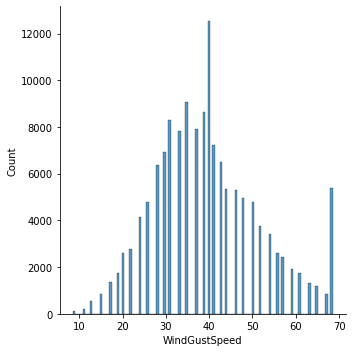

Humidity9am
-0.4392860750301736


<Figure size 1080x432 with 0 Axes>

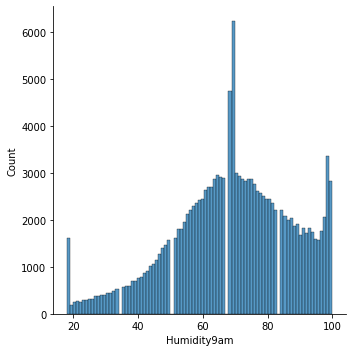

Humidity3pm
0.03536096185152833


<Figure size 1080x432 with 0 Axes>

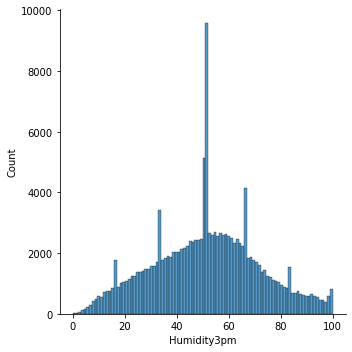

Pressure9am
0.0077924269423353554


<Figure size 1080x432 with 0 Axes>

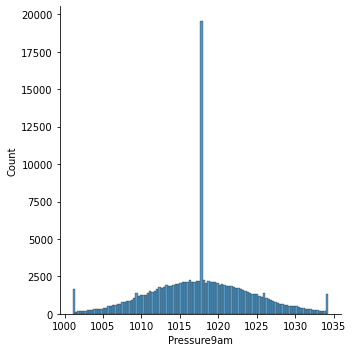

Pressure3pm
0.030475783059580975


<Figure size 1080x432 with 0 Axes>

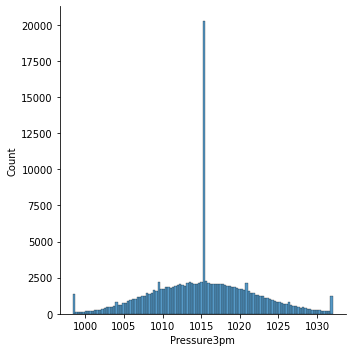

Cloud9am
-0.28747776850395046


<Figure size 1080x432 with 0 Axes>

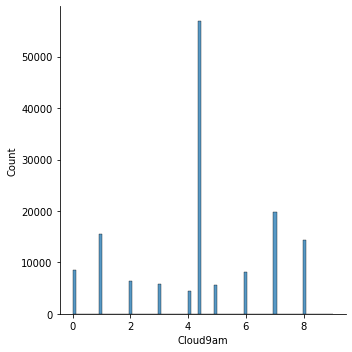

Cloud3pm
-0.17350040101639566


<Figure size 1080x432 with 0 Axes>

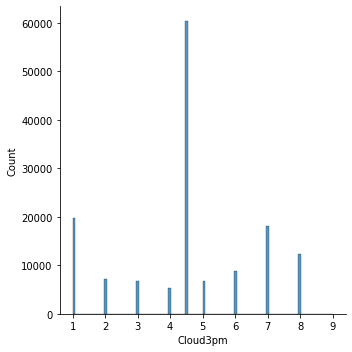

Temp3pm
0.25961592990415105


<Figure size 1080x432 with 0 Axes>

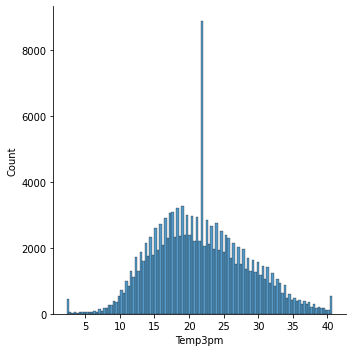

In [49]:
cols = ['MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm']

for col in cols:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.displot(df[col])
    plt.show()

Keterangan Skewness:
* Cukup simetris (fairly symmetrical) : -0.5 to 0.5
* Kemiringan sedang (moderate skewed) : -0.5 to -1.0 and 0.5 to 1.0
* Kemiringan berat (highly skewed) : <-1.0 and > 1.0

Pada data ini, Skewness pada semua kolom terlihat pada kriteria 'Fairly Symmetrical'.

## Train-test split data

Train-test split data dengan perbandingan 80:20

In [50]:
y = df['RainTomorrow'].astype('int64') 
X = df.drop(['RainTomorrow'], axis=1) 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0 )

Menghitung perbandingan nilai target "RainTomorrow' sebelum SMOTE

In [52]:
from collections import Counter
print("Before oversampling: ",Counter(y))

Before oversampling:  Counter({0: 113582, 1: 31877})


## Min-Max Scaler

Akan dilakukan feature scaling dengan menggunakan metode MinMax Scaler

In [53]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# Modelling

In [54]:
#Program print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [55]:
#Program cm_heatmap

def cm_heatmap(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

## Before SMOTE

### Logistic Regression

In [56]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train_scaled, y_train)

print_score(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 84.47%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.868054      0.712896   0.84475       0.790475       0.834043
recall         0.944772      0.488474   0.84475       0.716623       0.844750
f1-score       0.904790      0.579724   0.84475       0.742257       0.833534
support    90859.000000  25508.000000   0.84475  116367.000000  116367.000000
_______________________________________________
Confusion Matrix: 
 [[85841  5018]
 [13048 12460]]

Test Result:
Accuracy Score: 84.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.866871     0.715085  0.844493      0.790978      0.833641
recall         0.946222     0.481551  0.844493      0.713887      0.844493
f1-score       0.904810     0.575530  0.844493      0.740170      0.83

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



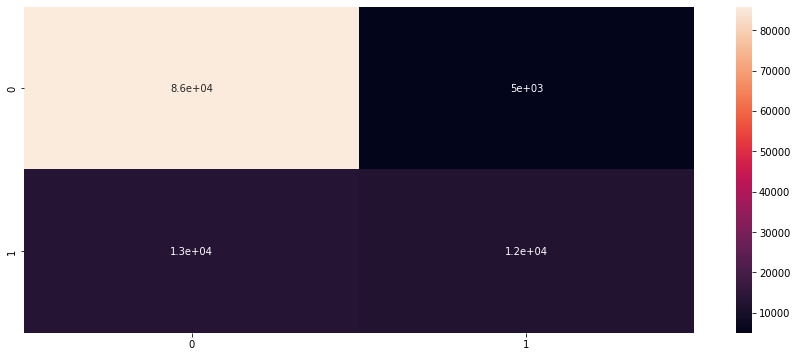

In [57]:
#Confusion Matrix LR (Training)
cm_heatmap(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



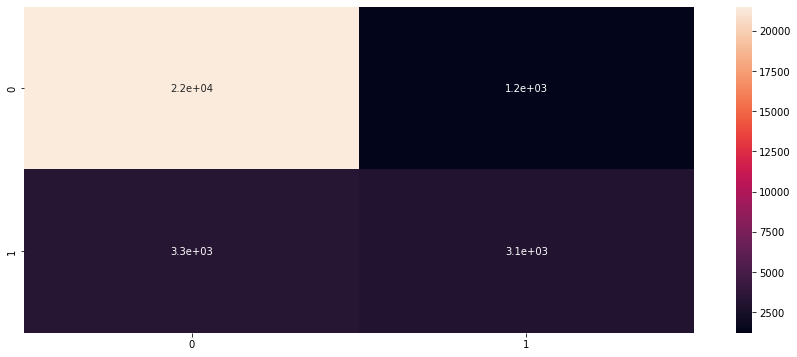

In [58]:
#Confusion Matrix LR (Test)
cm_heatmap(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

### Support Vector Machine

In [59]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_clf.fit(X_train_scaled, y_train)

print_score(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 85.16%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.862381      0.777658  0.851582       0.820019       0.843810
recall         0.963702      0.452211  0.851582       0.707957       0.851582
f1-score       0.910231      0.571875  0.851582       0.741053       0.836062
support    90859.000000  25508.000000  0.851582  116367.000000  116367.000000
_______________________________________________
Confusion Matrix: 
 [[87561  3298]
 [13973 11535]]

Test Result:
Accuracy Score: 84.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.858566     0.769574  0.847587      0.814070      0.839083
recall         0.963605     0.433663  0.847587      0.698634      0.847587
f1-score       0.908058     0.554730  0.847587      0.731394      0.83

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



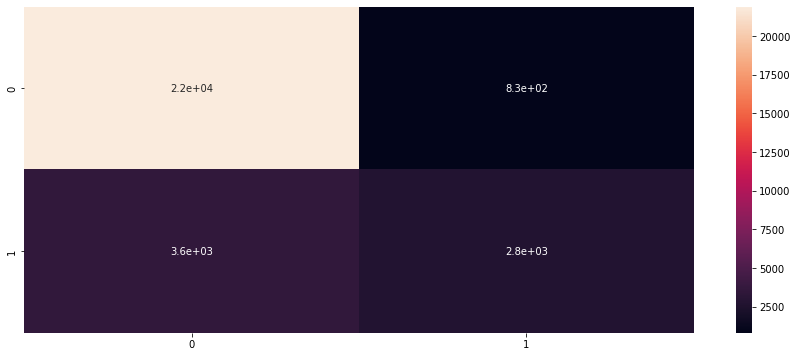

In [60]:
#Confusion Matrix SVM (Test)
cm_heatmap(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

## After SMOTE

In [61]:
# Inisiasi SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

# Melihat y setelah dilakukan SMOTE
from collections import Counter
print("After Oversampling: ",Counter(y_sm))

# Melakukan Train-test split kembali
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)
min_max_scaler = MinMaxScaler()

# Melakukan MinMax Scaler kembali
min_max_scaler.fit(X_train_sm)
X_train_sm = min_max_scaler.transform(X_train_sm)
X_test_sm = min_max_scaler.transform(X_test_sm)

After Oversampling:  Counter({0: 113582, 1: 113582})


### Logistic Regression

In [62]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf_sm = LogisticRegression(random_state=0)
lr_clf_sm.fit(X_train_sm, y_train_sm)

print_score(lr_clf, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=True)
print_score(lr_clf, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=False)

Train Result:
Accuracy Score: 71.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.648549      0.899011  0.716675       0.773780       0.773877
recall         0.945019      0.488684  0.716675       0.716852       0.716675
f1-score       0.769206      0.633183  0.716675       0.701194       0.701142
support    90795.000000  90936.000000  0.716675  181731.000000  181731.000000
_______________________________________________
Confusion Matrix: 
 [[85803  4992]
 [46497 44439]]

Test Result:
Accuracy Score: 71.80%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.650646      0.898775   0.71798      0.774711      0.774326
recall         0.945232      0.489314   0.71798      0.717273      0.717980
f1-score       0.770750      0.633653   0.71798      0.702201      

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



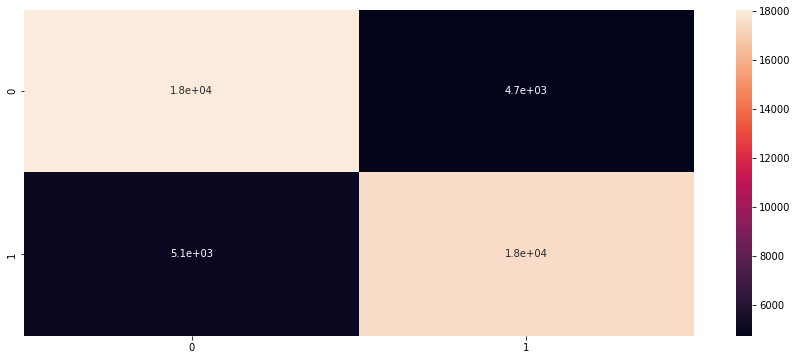

In [63]:
#Confusion Matrix LR (Test)
cm_heatmap(lr_clf_sm, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=False)

### Support Vector Machine

In [64]:
#SVM
from sklearn.svm import SVC

svm_clf_sm = SVC(random_state=0)
svm_clf_sm.fit(X_train_sm, y_train_sm)

print_score(svm_clf_sm, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=True)
print_score(svm_clf_sm, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=False)

Train Result:
Accuracy Score: 81.96%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.801305      0.840111  0.819557       0.820708       0.820723
recall         0.849474      0.789687  0.819557       0.819581       0.819557
f1-score       0.824687      0.814119  0.819557       0.819403       0.819399
support    90795.000000  90936.000000  0.819557  181731.000000  181731.000000
_______________________________________________
Confusion Matrix: 
 [[77128 13667]
 [19125 71811]]

Test Result:
Accuracy Score: 81.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.800141      0.836423  0.817159      0.818282      0.818225
recall         0.847018      0.787115  0.817159      0.817066      0.817159
f1-score       0.822912      0.811020  0.817159      0.816966      

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



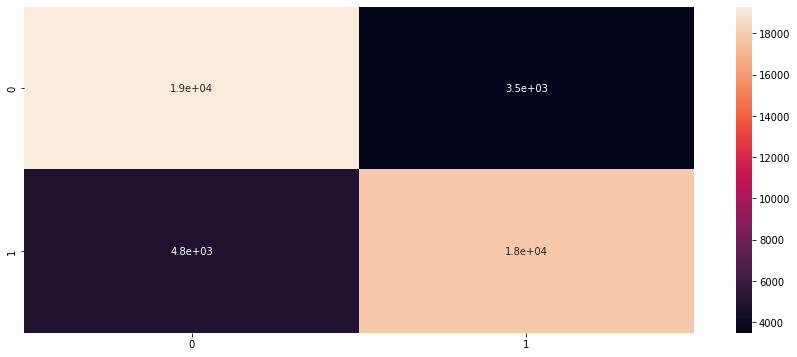

In [65]:
#Confusion Matrix SVM (Test)
cm_heatmap(svm_clf_sm, X_train_sm, y_train_sm, X_test_sm, y_test_sm, train=False)

Dapat dilihat bahwa sebelum dilakukan SMOTE dan sesudah untuk Logistic Regression dan SVM, model SVM (Sebelum SMOTE) memiliki nilai akurasi test yang baik yakni sebesar 84.76%. Sehingga dapat dikatakan bahwa model terbaik adalah model SVM yang tahap pertama yakni sebelum dilakukan SMOTE.

## Evaluation Model

**Melakukan predict untuk masing-masing algoritma**

In [86]:
lr_clf.predict(X_test_scaled[0:100])

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [103]:
svm_clf.predict(X_test_scaled[0:100])

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

**Melakukan predict dengan input nilai setiap fitur**

In [88]:
df

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,0.0,0.0
1,25.1,7.624853,44.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,24.3,0.0,0.0
2,25.7,7.624853,46.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,23.2,0.0,0.0
3,28.0,7.624853,24.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,26.5,0.0,0.0
4,32.3,7.624853,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,21.8,7.624853,31.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,20.9,0.0,0.0
145455,23.4,7.624853,31.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,22.4,0.0,0.0
145456,25.3,7.624853,22.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,24.5,0.0,0.0
145457,26.9,7.624853,37.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,26.1,0.0,0.0


In [89]:
df.loc[df['RainTomorrow']==1.0]

,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
8,31.9,7.624853,68.5,42.0,9.0,1008.90,1003.6,4.437189,4.503167,30.2,0.0,1.0
10,30.4,7.624853,30.0,48.0,22.0,1011.80,1008.7,4.437189,4.503167,28.8,0.0,1.0
11,21.7,7.624853,31.0,89.0,91.0,1010.50,1004.2,8.000000,8.000000,17.0,1.0,1.0
12,18.6,7.624853,61.0,76.0,93.0,1001.05,998.4,8.000000,8.000000,15.8,1.0,1.0
16,20.9,7.624853,22.0,69.0,82.0,1012.20,1010.4,8.000000,1.000000,18.1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145324,39.8,7.624853,65.0,38.0,24.0,1007.00,1003.6,4.437189,4.503167,36.6,0.0,1.0
145390,24.4,7.624853,35.0,28.0,91.0,1015.90,1013.9,8.000000,8.000000,18.5,0.0,1.0
145391,21.5,7.624853,30.0,65.0,65.0,1016.90,1015.3,3.000000,8.000000,21.2,1.0,1.0
145392,26.9,7.624853,35.0,93.0,59.0,1018.10,1014.7,7.000000,8.000000,26.0,1.0,1.0


In [90]:
lr_clf.predict([[22.9,7.624853,44.0,71.0,22.0,1007.7,1007.1,8,4.503167,21.8,0.0]])

array([0])

In [91]:
svm_clf.predict([[39.8,2.624853,78.5,42.0,9.0,1008.90,1003.6,9,9,50.2,0.0]])

array([0])

**Menyimpan model kedalam file berbentuk Pickle**

In [102]:
import pickle
pickle.dump(lr_clf, open('./lr_model_predict.pkl','wb'))
pickle.dump(svm_clf, open('./svm_model_predict.pkl','wb'))

#Conclusion

Pada dataset ini, setelah dilakukan tahapan mulai dari Data Cleaning hingga Data Preprocessing, diperoleh 11 fitur yang akan menunjang untuk dilakukan pemodelan terhadap variabel target "RainTomorrow" dalam memprediksi cuaca. Ke-11 fitur tersebut yakni: 

**'MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'**

Lalu, pada tahap modelling, dilakukan perbandingan modelling dengan menggunakan SMOTE. Didapatkan hasil bahwa hasil akurasi terbaik adalah model SVM tanpa SMOTE, dengan akurasi test sebesar 84.76%. Dengan model tersebut, akan dilakukan pembuatan GUI menggunakan Heroku untuk mempermudah seseorang dalam melakukan prediksi cuaca.
